### Data Preparation

In [ ]:
# Print GPU to see if we can render images
import tensorflow as tf
print('GPU version:' , tf.__version__)

# Prepare to work with directories
import os

# Required for visualizing images
import matplotlib.pyplot as plt
import random
import cv2

# Enables copy paste and list creation/manipulation
from shutil import copy
from collections import defaultdict
import collections

GPU version: 2.4.1


### Dataset

In [ ]:
# Check if the data has already been downloaded and download it if not
def get_data_extract():
  if "food-101" in os.listdir():
    print("Data has already been downloaded.")
  else:
    print("Downloading the data.")
    #"!" is placed infront of wget and tar in order to manually install the packages because they are not in google colab
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    !tar xzf food-101.tar.gz
    print('Download complete!')

# Run the function defined above
get_data_extract()

--2021-02-26 20:40:06--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2021-02-26 20:40:06--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  29.8MB/s    in 2m 40s  

2021-02-26 20:42:47 (29.7 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]

Download complete!


In [ ]:
# Look at the files in directory 
print('In the directory:' , os.listdir())
print('\nWithin food-101:' , os.listdir('food-101'))
print('Within meta:', os.listdir('food-101/meta'))
print('\nList of image categories in the folder to reference when selecting food types for the model:')
print(os.listdir('food-101/images'))

In the directory: ['.config', 'food-101.tar.gz', 'food-101', 'sample_data']

Within food-101: ['license_agreement.txt', 'meta', 'README.txt', 'images']
Within meta: ['test.json', 'labels.txt', 'test.txt', 'train.txt', 'classes.txt', 'train.json']

List of image categories in the folder to reference when selecting food types for the model:
['scallops', 'chocolate_mousse', 'crab_cakes', 'club_sandwich', 'spaghetti_bolognese', 'chicken_quesadilla', 'spaghetti_carbonara', 'samosa', 'sashimi', 'lobster_roll_sandwich', 'guacamole', 'edamame', 'beef_tartare', 'eggs_benedict', 'breakfast_burrito', 'pad_thai', 'lobster_bisque', 'hot_dog', 'cannoli', 'beef_carpaccio', 'shrimp_and_grits', 'churros', 'pulled_pork_sandwich', 'donuts', 'french_fries', 'bread_pudding', 'ramen', 'chicken_wings', 'pizza', 'miso_soup', 'garlic_bread', 'apple_pie', 'pork_chop', 'bruschetta', 'greek_salad', 'hamburger', 'fish_and_chips', 'croque_madame', 'onion_rings', 'ravioli', 'strawberry_shortcake', 'hot_and_sour_soup

### Choose the Food Categories to Clasify Moving Forward

In [ ]:
img_dir = 'food-101/images/'
food1 = 'pancakes' 
food2 = 'waffles' 
food3 = 'donuts'
list_foods = [food1, food2 ,food3]

print('Image category and count...\n')
for food in list_foods:
  print(food, len(os.listdir(img_dir+food)))

Image category and count...

pancakes 1000
waffles 1000
donuts 1000


food-101/images/pancakes/729861.jpg


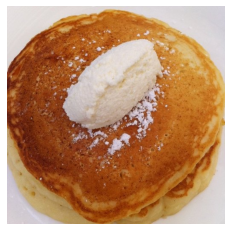

food-101/images/waffles/1596095.jpg


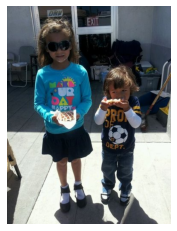

food-101/images/donuts/1629773.jpg


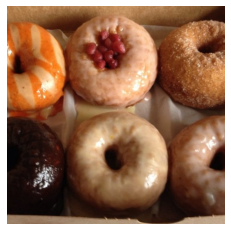

In [ ]:
#Show example of images for food selected, randomly selected from downloaded folder
for food in list_foods:
  img = img_dir+food+'/'+random.choice(os.listdir(img_dir+food)) 
  print(img)
  image = cv2.imread(img)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

### Create Test and Train Folders with Chosen Foods

In [ ]:
def prepare_data(filepath, src, dest):
    image_categories = defaultdict(list)
    with open(filepath, 'r') as txt:
        # Read line by line within the text file
        lines = [read.strip() for read in txt.readlines()]
        for line in lines:
            # Split each section of the line into a list, exampe ('waffle','657578')
            food = line.split('/')
            # Only do this for foods within the list of food types
            if food[0] in list_foods:
                # Append to list named
                image_categories[food[0]].append(food[1] + '.jpg')
            
        for food in image_categories.keys():
            print("Copying images into ",food)
            if not os.path.exists(os.path.join(dest,food)):
                os.makedirs(os.path.join(dest,food))
            for i in image_categories[food]:
                copy(os.path.join(src,food,i), os.path.join(dest,food,i))

In [ ]:
# Prepare training dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...
Copying images into  donuts
Copying images into  pancakes
Copying images into  waffles


In [ ]:
# Do the same for the test dataset
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...
Copying images into  donuts
Copying images into  pancakes
Copying images into  waffles


In [ ]:
print('Count files in the train folder...')
ttl_train = []
for file in os.listdir('food-101/train/'):
  x=len(os.listdir('food-101/train/'+file))
  ttl_train.append(x)
  print(file,x)
print('total:',sum(ttl_train))

print('\nCount files in the test folder...')
ttl_test = []
for file in os.listdir('food-101/test/'):
  x=len(os.listdir('food-101/test/'+file))
  ttl_test.append(x)
  print(file,x)
print('total:',sum(ttl_test))

Count files in the train folder...
donuts 750
waffles 750
pancakes 750
total: 2250

Count files in the test folder...
donuts 250
waffles 250
pancakes 250
total: 750


### Train the Model

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import GlobalAveragePooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model

In [ ]:
# Deletes old and starts anew
K.clear_session()

# Begin training
train_data_dir, validation_data_dir = 'food-101/train', 'food-101/test'
nb_train_samples, nb_validation_samples = 2250, 750
batch_size = 20

train_imgdatagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.4,1.5],
    fill_mode='nearest')

test_imgdatagen = ImageDataGenerator(rescale=1. / 255)

# Takes the path to a directory & generates batches of augmented data.
train_gen = train_imgdatagen.flow_from_directory(
    train_data_dir,
    batch_size=batch_size,
    seed = 23,
    class_mode='categorical')

# Takes the path to a directory & generates batches of augmented data.
test_gen = test_imgdatagen.flow_from_directory(
    validation_data_dir,
    batch_size=batch_size,
    seed = 23,
    class_mode='categorical')

# InceptionV3 is a convolutional neural network (CNN) used for image classification tasks.
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x) #layer
x = Dense(512,activation='relu')(x) #layer

# Softmax function is frequently used for classification tasks (prediction)
predictions = Dense(3,kernel_regularizer=regularizers.l2(0.01), activation='softmax')(x)

inputs = tf.keras.Input(shape=(255,)) # Instantiate a Keras tensor
model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy']) # Stochastic Gradient Descent
csv_logger = CSVLogger('history.log')

history = model.fit(train_gen,
          steps_per_epoch = nb_train_samples // batch_size,
          validation_data=test_gen,
          validation_steps=nb_validation_samples // batch_size,
          epochs=5,
          verbose=1,
          callbacks=[csv_logger])

print ('Model trained.')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
87916544/87910968 [==============================] - 0s 0us/step
Epoch 1/5
112/112 [==============================] - 69s 501ms/step - loss: 1.0047 - accuracy: 0.5629 - val_loss: 0.2777 - val_accuracy: 0.9257
Epoch 2/5
112/112 [==============================] - 53s 473ms/step - loss: 0.5297 - accuracy: 0.8137 - val_loss: 0.2572 - val_accuracy: 0.9243
Epoch 3/5
112/112 [==============================] - 53s 476ms/step - loss: 0.4013 - accuracy: 0.8693 - val_loss: 0.2739 - val_accuracy: 0.9081
Epoch 4/5
112/112 [==============================] - 53s 475ms/step - loss: 0.3245 - accuracy: 0.9028 - val_loss: 0.1947 - val_accuracy: 0.9486
Epoch 5/5
112/112 [==============================] - 53s 472ms/step - loss: 0.3000 - accuracy: 0.9025 - val_loss: 0.2120 - val_accuracy: 0.9527
Model trained.


In [ ]:
# Save and download the model
!mkdir -p saved_model
model.save('saved_model/Alfred_model_trained.hdf5')
#from google.colab import files
#files.download('saved_model/Alfred_model_trained.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Visualize the Accuracy and Loss

Text(0.5, 1.0, 'CNN Model Accuracy & Loss Results')

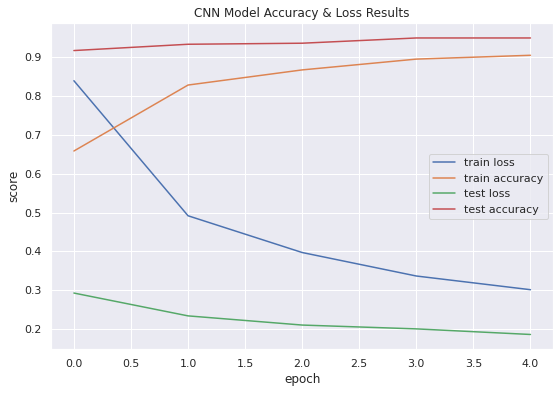

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,6)})

sns.lineplot(data=history.history, dashes=False)
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['train loss', 'train accuracy','test loss','test accuracy'], loc='best')
plt.title('CNN Model Accuracy & Loss Results')

### Use the Model

In [ ]:
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('Alfred_model_trained.hdf5',compile = False)

In [ ]:
# Load any image from onlie within the list of trained categories
!wget -O pic.jpg https://thefoodgallery.files.wordpress.com/2015/02/20150203_timbits.jpg
print('Image downloaded as pic.jpg.')

--2020-10-31 17:26:09--  https://thefoodgallery.files.wordpress.com/2015/02/20150203_timbits.jpg
Resolving thefoodgallery.files.wordpress.com (thefoodgallery.files.wordpress.com)... 192.0.72.20, 192.0.72.21
Connecting to thefoodgallery.files.wordpress.com (thefoodgallery.files.wordpress.com)|192.0.72.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251492 (246K) [image/jpeg]
Saving to: ‘pic.jpg’

pic.jpg             100%[===================>] 245.60K  --.-KB/s    in 0.05s   

2020-10-31 17:26:09 (4.85 MB/s) - ‘pic.jpg’ saved [251492/251492]

Image downloaded as pic.jpg.


Prediction: donuts


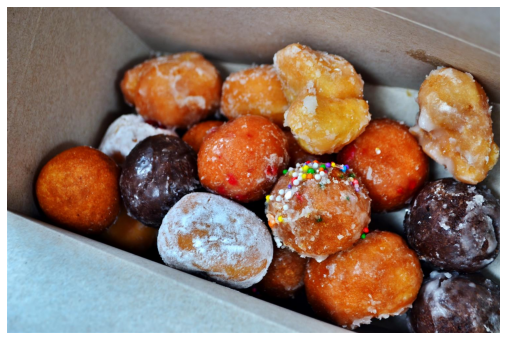

In [ ]:
img_loaded = 'pic.jpg'

import numpy as np
from tensorflow.keras.preprocessing import image

img = image.img_to_array(image.load_img(img_loaded, target_size=(299, 299)))                    
img = np.expand_dims(img, axis=0)         
img /= 255.                                      
pred = model.predict(img)
index = np.argmax(pred)
list_foods.sort()
pred_value = list_foods[index]

print('Prediction:',pred_value)
image = cv2.imread(img_loaded)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()